In [1]:
import pandas as pd
import numpy as np
import random as rnd
from scipy.io.arff import loadarff

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score

# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error

# plot metrics model answer(metrics)
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelBinarizer


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
#import umap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel

In [2]:
raw_data = loadarff('data/cleaned/pc4.arff')
df_data = pd.DataFrame(raw_data[0])
df_data

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,22.0,15.0,9.0,4.0,11.0,26.0,8.0,0.22,12.0,2.17,...,29.0,0.11,42.0,78.0,23.0,16.0,71.0,31.91,36.0,b'Y'
1,7.0,1.0,2.0,0.0,2.0,0.0,1.0,0.14,0.0,0.00,...,4.0,0.06,8.0,30.0,4.0,10.0,18.0,22.22,7.0,b'N'
2,10.0,3.0,2.0,0.0,2.0,4.0,2.0,0.20,2.0,2.00,...,9.0,0.08,12.0,25.0,8.0,12.0,24.0,16.67,10.0,b'N'
3,9.0,3.0,2.0,0.0,6.0,4.0,2.0,0.20,2.0,2.00,...,9.0,0.07,12.0,26.0,8.0,12.0,27.0,37.50,10.0,b'N'
4,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.25,0.0,0.00,...,2.0,0.10,4.0,8.0,3.0,7.0,10.0,0.00,4.0,b'N'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0.0,3.0,0.0,0.0,0.0,4.0,2.0,0.29,2.0,2.00,...,7.0,0.22,17.0,23.0,5.0,7.0,9.0,0.00,7.0,b'N'
1375,0.0,3.0,0.0,0.0,0.0,4.0,2.0,0.33,2.0,2.00,...,7.0,0.25,13.0,17.0,5.0,7.0,8.0,0.00,6.0,b'N'
1376,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.07,0.0,0.00,...,3.0,0.06,29.0,76.0,3.0,8.0,17.0,0.00,15.0,b'N'
1377,1.0,3.0,1.0,0.0,0.0,4.0,2.0,0.40,2.0,2.00,...,7.0,0.25,10.0,14.0,6.0,10.0,8.0,0.00,5.0,b'N'


In [3]:
df_data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        1379 non-null   float64
 1   BRANCH_COUNT                     1379 non-null   float64
 2   CALL_PAIRS                       1379 non-null   float64
 3   LOC_CODE_AND_COMMENT             1379 non-null   float64
 4   LOC_COMMENTS                     1379 non-null   float64
 5   CONDITION_COUNT                  1379 non-null   float64
 6   CYCLOMATIC_COMPLEXITY            1379 non-null   float64
 7   CYCLOMATIC_DENSITY               1379 non-null   float64
 8   DECISION_COUNT                   1379 non-null   float64
 9   DECISION_DENSITY                 1379 non-null   float64
 10  DESIGN_COMPLEXITY                1379 non-null   float64
 11  DESIGN_DENSITY                   1379 non-null   float64
 12  EDGE_COUNT          

In [4]:
df_data.describe() #shows simple statistics (min, max, mean, etc.)

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,...,344.000000,344.000000,344.000000,344.00000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,16.052326,12.566860,3.651163,5.406977,16.700581,20.162791,7.084302,0.171337,9.517442,2.115174,...,10.113372,24.552326,0.108692,73.84593,115.247093,34.069767,18.662791,79.063953,29.026512,45.017442
std,22.800508,16.543825,3.899667,9.908182,29.940766,26.805361,9.280934,0.065036,12.485314,0.314881,...,13.442305,28.748992,0.058222,97.03714,148.792849,37.706954,9.273443,94.612523,18.976816,55.341871
min,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.040000,2.000000,2.000000,...,2.000000,5.000000,0.020000,4.00000,7.000000,3.000000,4.000000,9.000000,0.000000,7.000000
25%,3.000000,5.000000,1.000000,0.000000,1.000000,6.000000,3.000000,0.130000,2.000000,2.000000,...,3.000000,9.000000,0.070000,19.00000,32.750000,11.750000,12.000000,25.750000,13.640000,17.000000
50%,9.000000,7.000000,3.000000,2.000000,7.000000,12.000000,4.000000,0.160000,6.000000,2.000000,...,6.000000,14.000000,0.100000,37.00000,64.000000,21.000000,17.000000,49.000000,30.770000,27.000000
75%,19.000000,13.000000,5.000000,6.000000,20.000000,22.000000,7.250000,0.200000,10.000000,2.060000,...,11.000000,29.250000,0.130000,89.00000,129.250000,41.000000,22.000000,88.000000,44.847500,50.000000
max,164.000000,162.000000,26.000000,80.000000,339.000000,248.000000,96.000000,0.560000,118.000000,5.000000,...,124.000000,251.000000,0.500000,798.00000,1229.000000,314.000000,72.000000,764.000000,71.930000,503.000000


In [4]:
# trasform to binary and extract target dont run twice
df_data['Defective'] = df_data['Defective'].apply(lambda x: 1 if x == b'Y' else 0)
df_data.groupby("Defective").size()

Defective
0    1201
1     178
dtype: int64

In [5]:
X = df_data.iloc[:, 0:-1]
y = df_data["Defective"]

print("X:", X.shape)
print("y:", y.shape)

X: (1379, 37)
y: (1379,)


Classes: [0, 1]
Counts: [1201, 178]


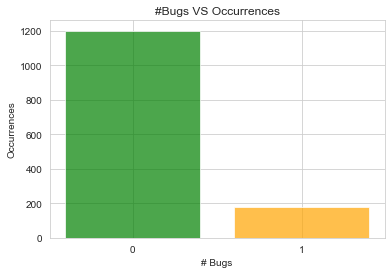

In [6]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [9]:
#oversampling using SMOTE up to 40%

In [8]:
from imblearn.over_sampling import SMOTE
X_train_over_sampled, y_train_over_sampled = SMOTE(sampling_strategy=0.3).fit_resample(X, y)
#X_cv_over_sampled, y_cv_over_sampled = SMOTE().fit_resample(X_cv, y_cv)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape)

Train: (1561, 37) (1561,)


Classes: [0, 1]
Counts: [1201, 360]


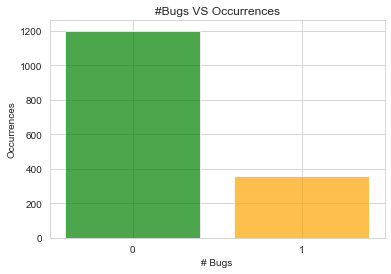

In [9]:
unique, counts = np.unique(y_train_over_sampled, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [10]:
X_train_size_features = X_train_over_sampled[['LOC_BLANK','PERCENT_COMMENTS','PARAMETER_COUNT']]
X_train_complexity_features = X_train_over_sampled[['CONDITION_COUNT','CYCLOMATIC_DENSITY','DESIGN_COMPLEXITY','DESIGN_DENSITY','ESSENTIAL_COMPLEXITY','NUM_OPERATORS','HALSTEAD_LEVEL']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_train_complexity_features, y_train_over_sampled, test_size=0.3,random_state=7)
#X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5)
#print("Train:", X_train.shape, y_train.shape,
#      "Test:", X_test.shape, y_test.shape,
#      "Cross Validation", X_cv.shape, y_cv.shape)

In [13]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_size_features, y_train_over_sampled, test_size=0.3,random_state=7)
#X_cv2, X_test2, y_cv2, y_test2 = train_test_split(X_test2, y_test2, test_size=0.5)
#print("Train:", X_train.shape, y_train.shape,
#      "Test:", X_test.shape, y_test.shape,
#      "Cross Validation", X_cv.shape, y_cv.shape)

In [14]:
model = LogisticRegression()

In [15]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_size_features, y_train_over_sampled, scoring='roc_auc', cv=cv, n_jobs=-1)

In [16]:
scores.mean()

0.773450445107642

In [17]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [18]:
scores

array([0.90613553, 0.81868132, 0.75833333, 0.74761905, 0.83761905,
       0.82571429, 0.82809524, 0.82761905, 0.84857143, 0.9126506 ,
       0.83424908, 0.89514652, 0.78857143, 0.8152381 , 0.8247619 ,
       0.87047619, 0.83285714, 0.81857143, 0.86666667, 0.77988879,
       0.85622711, 0.85164835, 0.80333333, 0.85095238, 0.73095238,
       0.81285714, 0.81761905, 0.8247619 , 0.85238095, 0.89063948])

In [19]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train2, y_train2, scoring='roc_auc', cv=cv, n_jobs=-1)

In [20]:
scores

array([0.82600733, 0.84340659, 0.75071429, 0.69666667, 0.79047619,
       0.82761905, 0.67      , 0.80666667, 0.75666667, 0.75440222,
       0.7779304 , 0.80448718, 0.7947619 , 0.73095238, 0.76333333,
       0.77238095, 0.7952381 , 0.73428571, 0.7752381 , 0.7673772 ,
       0.81913919, 0.76694139, 0.81095238, 0.75714286, 0.68857143,
       0.77333333, 0.73309524, 0.80142857, 0.76238095, 0.77803522])

In [134]:
#scores=[]
#skf = StratifiedKFold(n_splits=10)
#for train, test in skf.split(X_train,y_train):
#    print("%s %s" % (train.size,test.size))


In [15]:
# Import for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Prepare a dataframe for VIF
X_VIF = add_constant(X_train_over_sampled)

# Simulate a multicollinearity situation of AddedLOC, A, and B
#X_VIF['A'] = [2 * x_i + random.random() for x_i in X_VIF['AddedLOC']]
#X_VIF['B'] = [3 * x_i + random.random() for x_i in X_VIF['AddedLOC']]

# Calculate VIF scores
vif_scores = pd.DataFrame([variance_inflation_factor(X_VIF.values, i) 
               for i in range(X_VIF.shape[1])], 
              index=X_VIF.columns)
# Prepare a final dataframe of VIF scores
vif_scores.reset_index(inplace = True)
vif_scores.columns = ['Feature', 'VIFscore']
vif_scores = vif_scores.loc[vif_scores['Feature'] != 'const', :]
vif_scores = vif_scores.sort_values(by = ['VIFscore'], ascending = False)
vif_scores

,Feature,VIFscore
37,LOC_TOTAL,inf
9,DECISION_COUNT,inf
16,LOC_EXECUTABLE,inf
27,MODIFIED_CONDITION_COUNT,inf
13,EDGE_COUNT,inf
22,HALSTEAD_LENGTH,inf
31,NUM_OPERANDS,inf
29,NODE_COUNT,inf
32,NUM_OPERATORS,inf
7,CYCLOMATIC_COMPLEXITY,inf


In [146]:
X_train = X_train[['NUMBER_OF_LINES','NUM_UNIQUE_OPERANDS','HALSTEAD_LEVEL']]

In [147]:
X_train

,NUMBER_OF_LINES,NUM_UNIQUE_OPERANDS,HALSTEAD_LEVEL
84,49.0,21.0,0.05
259,16.0,16.0,0.15
99,99.0,50.0,0.05
15,55.0,34.0,0.09
240,95.0,31.0,0.05
...,...,...,...
211,11.0,7.0,0.07
67,10.0,4.0,0.10
25,70.0,33.0,0.07
196,18.0,12.0,0.08


In [79]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

# Import for Construct a black-box model (Regression)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression

# Import for ANOVA (Regression)
import statsmodels.api as sm

In [148]:
X_train

,NUMBER_OF_LINES,NUM_UNIQUE_OPERANDS,HALSTEAD_LEVEL
84,49.0,21.0,0.05
259,16.0,16.0,0.15
99,99.0,50.0,0.05
15,55.0,34.0,0.09
240,95.0,31.0,0.05
...,...,...,...
211,11.0,7.0,0.07
67,10.0,4.0,0.10
25,70.0,33.0,0.07
196,18.0,12.0,0.08


<AxesSubplot:ylabel='Features'>

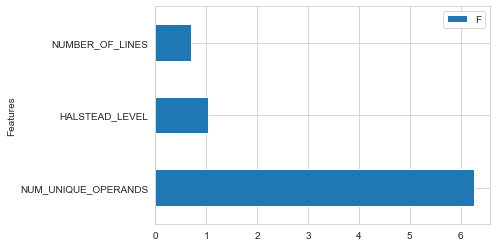

In [149]:



#train_dataset = pd.read_csv(("../../../datasets/lucene-2.9.0.csv"), index_col = 'File')
#test_dataset = pd.read_csv(("../../../datasets/lucene-3.0.0.csv"), index_col = 'File')

outcome = 'Defective'
features = ['NUMBER_OF_LINES','NUM_UNIQUE_OPERANDS','HALSTEAD_LEVEL']

X_train = X_train
X_test = X_test

y_train = y_train
y_test = y_test

# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code
features = ['NUM_UNIQUE_OPERANDS','HALSTEAD_LEVEL','NUMBER_OF_LINES']

training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

## Construct a black-box model (Regression)

# regression (ols)
model_formula = outcome + ' ~ ' + ' + '.join(features)
regression_model = ols(model_formula, data = training_data)
regression_model_fit = regression_model.fit()


# compute an ANOVA Type-II table
aov_table = sm.stats.anova_lm(regression_model_fit, 
                              typ=2)
aov_table.sort_values(by = 'sum_sq', ascending = False, inplace = True)

# visualize an ANOVA Type-II table
aov_table['Features'] = aov_table.index
aov_table.iloc[1:,:].plot(kind = 'barh', y = 'F', x = 'Features') # remove the residual

In [14]:
from varclushi import VarClusHi

In [15]:
var_clus_model= VarClusHi(X, maxeigval2=.7,maxclus=None)

In [17]:
var_clus_model.varclus()

In [18]:
var_clus_model.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,LOC_COMMENTS,0.699174,0.609576,0.770510
1,0,DESIGN_COMPLEXITY,0.841492,0.803775,0.807786
2,0,LOC_EXECUTABLE,0.942959,0.859172,0.405039
3,0,HALSTEAD_EFFORT,0.815356,0.669819,0.559219
4,0,HALSTEAD_ERROR_EST,0.981717,0.838480,0.113192
5,0,HALSTEAD_LENGTH,0.965518,0.827486,0.199881
6,0,HALSTEAD_PROG_TIME,0.815356,0.669819,0.559219
7,0,HALSTEAD_VOLUME,0.981573,0.838526,0.114118
8,0,NUM_OPERANDS,0.944567,0.808145,0.288931
9,0,NUM_OPERATORS,0.967152,0.829801,0.192996


In [75]:
# metric correlations

In [192]:
df_data.corr()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
LOC_BLANK,1.000000,0.648534,0.566512,0.671470,0.567611,0.621633,0.648127,-0.152460,0.622053,0.010581,...,0.622592,0.654418,-0.313193,0.714419,0.719372,0.667319,0.674402,0.820189,0.327185,0.681662
BRANCH_COUNT,0.648534,1.000000,0.620550,0.735743,0.797113,0.969182,0.990897,0.032704,0.958161,0.117456,...,0.969980,0.964786,-0.017207,0.887006,0.907087,0.856536,0.789202,0.907085,0.153343,0.953950
CALL_PAIRS,0.566512,0.620550,1.000000,0.459580,0.649342,0.569456,0.629860,-0.218407,0.561197,0.067527,...,0.571049,0.672989,-0.305827,0.655011,0.685099,0.699345,0.696027,0.713599,0.256492,0.692475
LOC_CODE_AND_COMMENT,0.671470,0.735743,0.459580,1.000000,0.516638,0.723562,0.726577,-0.128072,0.725867,0.005612,...,0.722382,0.733900,-0.187128,0.723138,0.717711,0.642754,0.639463,0.738269,0.357911,0.748260
LOC_COMMENTS,0.567611,0.797113,0.649342,0.516638,1.000000,0.771232,0.786255,-0.147256,0.753877,0.081572,...,0.771561,0.769210,-0.254405,0.771507,0.789731,0.798816,0.690314,0.853740,0.401223,0.831810
CONDITION_COUNT,0.621633,0.969182,0.569456,0.723562,0.771232,1.000000,0.930438,0.001380,0.997091,0.055615,...,0.999837,0.966904,-0.047424,0.873779,0.881760,0.845922,0.731119,0.866411,0.166041,0.914640
CYCLOMATIC_COMPLEXITY,0.648127,0.990897,0.629860,0.726577,0.786255,0.930438,1.000000,0.042125,0.918147,0.125930,...,0.931576,0.941592,-0.006108,0.878102,0.902079,0.838215,0.799533,0.907656,0.142211,0.951839
CYCLOMATIC_DENSITY,-0.152460,0.032704,-0.218407,-0.128072,-0.147256,0.001380,0.042125,1.000000,-0.017658,0.379037,...,0.004228,-0.074400,0.852567,-0.195260,-0.185384,-0.253336,-0.170907,-0.192186,-0.243702,-0.171343
DECISION_COUNT,0.622053,0.958161,0.561197,0.725867,0.753877,0.997091,0.918147,-0.017658,1.000000,0.008097,...,0.996433,0.965928,-0.063197,0.872351,0.878002,0.840876,0.722934,0.861043,0.165824,0.908090
DECISION_DENSITY,0.010581,0.117456,0.067527,0.005612,0.081572,0.055615,0.125930,0.379037,0.008097,1.000000,...,0.060895,0.039410,0.365274,0.031971,0.048733,0.036554,0.124794,0.056368,-0.054882,0.057415


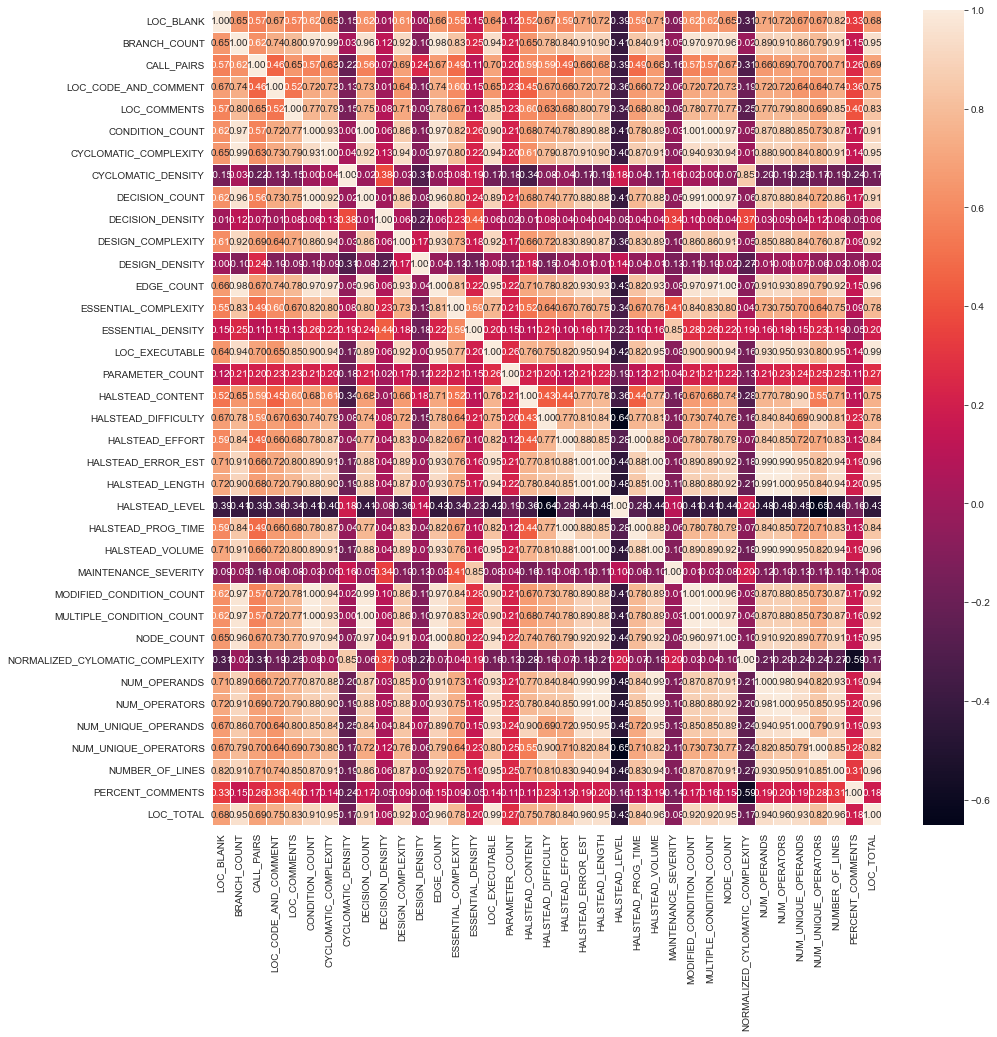

In [233]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df_data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [357]:
cor_matrix = df_data.corr().abs()

In [358]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                 LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  \
LOC_BLANK                              NaN      0.648534    0.566512   
BRANCH_COUNT                           NaN           NaN    0.620550   
CALL_PAIRS                             NaN           NaN         NaN   
LOC_CODE_AND_COMMENT                   NaN           NaN         NaN   
LOC_COMMENTS                           NaN           NaN         NaN   
CONDITION_COUNT                        NaN           NaN         NaN   
CYCLOMATIC_COMPLEXITY                  NaN           NaN         NaN   
CYCLOMATIC_DENSITY                     NaN           NaN         NaN   
DECISION_COUNT                         NaN           NaN         NaN   
DECISION_DENSITY                       NaN           NaN         NaN   
DESIGN_COMPLEXITY                      NaN           NaN         NaN   
DESIGN_DENSITY                         NaN           NaN         NaN   
EDGE_COUNT                             NaN           NaN        

In [388]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
print(to_drop)

['LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY', 'DECISION_COUNT', 'DESIGN_COMPLEXITY', 'EDGE_COUNT', 'ESSENTIAL_COMPLEXITY', 'LOC_EXECUTABLE', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT', 'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'NUMBER_OF_LINES', 'LOC_TOTAL']


In [360]:
df_data = df_data.drop(df_data[to_drop], axis=1)

In [361]:
df_data.shape

(344, 22)

In [362]:
# trasform to binary and extract target dont run twice
df_data['Defective'] = df_data['Defective'].apply(lambda x: 1 if x == b'Y' else 0)
df_data.groupby("Defective").size()


Defective
0    302
1     42
dtype: int64

In [363]:
y = df_data.pop('Defective')
X = df_data

In [ ]:
#resampling using SMOTE

In [364]:
from imblearn.over_sampling import SMOTE
X_train_over_sampled, y_train_over_sampled = SMOTE().fit_resample(X, y)
print("Train:", X_over_sampled.shape, y_over_sampled.shape)

Train: (604, 21) (604,)


Classes: [0, 1]
Counts: [302, 302]


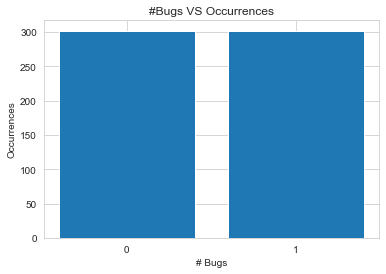

In [365]:
unique, counts = np.unique(y_train_over_sampled, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [366]:
bugs= y_train_over_sampled.groupby(y_train_over_sampled)
bugs.size()

Defective
0    302
1    302
Name: Defective, dtype: int64

In [ ]:
#feature importance using xgboost

In [367]:
model = XGBClassifier()
model.fit(X_train_over_sampled,y_train_over_sampled)

[18:57:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [368]:
print(model.feature_importances_)

[0.01982842 0.11254603 0.04168405 0.05134916 0.20344292 0.05728162
 0.07694246 0.06241813 0.04294465 0.02329681 0.05814723 0.05039862
 0.03250306 0.01491102 0.01428461 0.01636813 0.03647915 0.01789387
 0.02004047 0.01655624 0.03068329]


In [369]:
features = pd.DataFrame(model.feature_importances_)

In [370]:
features.describe()

,0
count,21.000000
mean,0.047619
std,0.043375
min,0.014285
25%,0.019828
50%,0.036479
75%,0.057282
max,0.203443


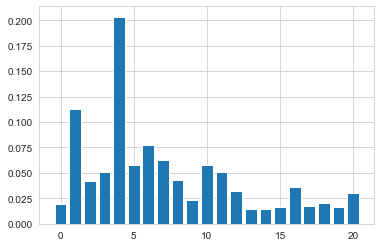

In [371]:
pyplot.bar(range(len(model.feature_importances_)),model.feature_importances_)
pyplot.show()

In [375]:
for feature in zip(X_train_over_sampled.columns,model.feature_importances_):  
    print(feature)

('LOC_BLANK', 0.01982842)
('BRANCH_COUNT', 0.11254603)
('CALL_PAIRS', 0.04168405)
('LOC_CODE_AND_COMMENT', 0.05134916)
('LOC_COMMENTS', 0.20344292)
('CYCLOMATIC_DENSITY', 0.057281625)
('DECISION_DENSITY', 0.07694246)
('DESIGN_COMPLEXITY', 0.062418126)
('DESIGN_DENSITY', 0.04294465)
('ESSENTIAL_COMPLEXITY', 0.023296813)
('ESSENTIAL_DENSITY', 0.05814723)
('PARAMETER_COUNT', 0.050398618)
('HALSTEAD_CONTENT', 0.032503065)
('HALSTEAD_DIFFICULTY', 0.014911018)
('HALSTEAD_EFFORT', 0.014284614)
('HALSTEAD_LEVEL', 0.016368128)
('MAINTENANCE_SEVERITY', 0.036479145)
('NORMALIZED_CYLOMATIC_COMPLEXITY', 0.017893866)
('NUM_UNIQUE_OPERATORS', 0.020040466)
('NUMBER_OF_LINES', 0.016556239)
('PERCENT_COMMENTS', 0.030683286)


In [383]:
feature_list=[];
for feature in zip(X_train_over_sampled.columns,model.feature_importances_):
    if feature[1] > 0.026:
        print(feature)
        feature_list.append(feature)

('BRANCH_COUNT', 0.11254603)
('CALL_PAIRS', 0.04168405)
('LOC_CODE_AND_COMMENT', 0.05134916)
('LOC_COMMENTS', 0.20344292)
('CYCLOMATIC_DENSITY', 0.057281625)
('DECISION_DENSITY', 0.07694246)
('DESIGN_COMPLEXITY', 0.062418126)
('DESIGN_DENSITY', 0.04294465)
('ESSENTIAL_DENSITY', 0.05814723)
('PARAMETER_COUNT', 0.050398618)
('HALSTEAD_CONTENT', 0.032503065)
('MAINTENANCE_SEVERITY', 0.036479145)
('PERCENT_COMMENTS', 0.030683286)


In [ ]:
# ranking features

In [387]:
feature_list.sort(key=lambda item: item[1])
feature_list.reverse()
features= pd.DataFrame(feature_list)
features

,0,1
0,LOC_COMMENTS,0.203443
1,BRANCH_COUNT,0.112546
2,DECISION_DENSITY,0.076942
3,DESIGN_COMPLEXITY,0.062418
4,ESSENTIAL_DENSITY,0.058147
5,CYCLOMATIC_DENSITY,0.057282
6,LOC_CODE_AND_COMMENT,0.051349
7,PARAMETER_COUNT,0.050399
8,DESIGN_DENSITY,0.042945
9,CALL_PAIRS,0.041684


In [300]:
X_train_over_sampled.shape

(604, 21)

In [304]:
sfm=SelectFromModel(model,threshold=0.022)
X_important_train=sfm.fit(X_train_over_sampled,y_train_over_sampled)

[20:31:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [305]:
X_train_important_over_sampled = X_important_train.transform(X_train_over_sampled)

In [306]:
X_train_important_over_sampled.shape

(604, 16)

In [322]:
# hyper-parameter
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train_over_sampled, X_test_over_sampled, y_train_over_sampled, y_test_over_sampled = train_test_split(X_train_important_over_sampled, y_train_over_sampled, test_size=0.3,random_state=7)
X_cv_over_sampled, X_test_over_sampled, y_cv_over_sampled, y_test_over_sampled = train_test_split(X_test_over_sampled, y_test_over_sampled, test_size=0.5)
print("Train:", X_train.shape, y_train.shape,
      "Test:", X_test.shape, y_test.shape,
      "Cross Validation", X_cv.shape, y_cv.shape)


Train: (240, 21) (240,) Test: (52, 21) (52,) Cross Validation (52, 21) (52,)


In [ ]:
#feature importance using lasso

In [64]:
lasso = Lasso(alpha=0.1) #0.5
lasso.fit(X_train_over_sampled,y_train_over_sampled)

Lasso(alpha=0.1)

In [65]:
coef = pd.Series(lasso.coef_, index = X_train.columns)

print("Discarded Features:", np.sum(lasso.coef_==0), "out of", len(X_train.columns))
print(coef)

Discarded Features: 4 out of 13
LOC_BLANK               2.230573e-03
BRANCH_COUNT            4.230357e-04
LOC_CODE_AND_COMMENT    0.000000e+00
LOC_COMMENTS            1.991498e-03
DESIGN_COMPLEXITY       3.431331e-03
ESSENTIAL_COMPLEXITY    0.000000e+00
LOC_EXECUTABLE          5.272725e-04
HALSTEAD_CONTENT        1.332766e-03
HALSTEAD_DIFFICULTY     1.149439e-03
HALSTEAD_EFFORT        -2.388281e-07
HALSTEAD_LEVEL         -0.000000e+00
NUM_UNIQUE_OPERANDS    -0.000000e+00
NUM_UNIQUE_OPERATORS    4.377003e-03
dtype: float64


In [66]:
coef = coef[coef != 0]

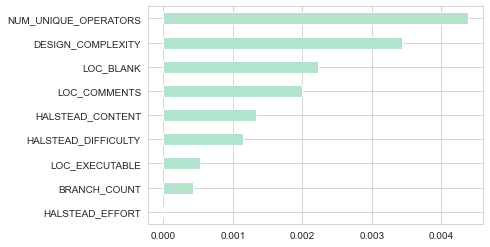

In [67]:
coef.sort_values().plot(kind='barh', cmap="Pastel2");

In [323]:
def Modeler(model, X_train, y_train, X_cv, y_cv, params, scale=False, n_jobs=True, pca=False):
    
    if scale & pca:
        pipeline = Pipeline([
            ('scale', StandardScaler()),
            ('dim_reduct', PCA(n_components=4)),
            ('clf', model())])
        print("Scaling and dim reduct...")
        
    elif scale:
        pipeline = Pipeline([ ('scale', StandardScaler()), ('clf', model())])
        
    elif pca:
        pipeline = Pipeline([
        ('dim_reduct', PCA(n_components=pca)),
        ('clf', model())])
    else:
        pipeline = Pipeline([('clf', model())])
        
    grid = GridSearchCV(pipeline, param_grid = params, cv=5, n_jobs=4, refit=True)
    grid.fit(X_cv, y_cv)
    
    best_prameters = {}
    for k, v in grid.best_params_.items():
        best_prameters[k[5:]] = v

    if n_jobs:
        model = model(**best_prameters, n_jobs=4)
    else:
        model = model(**best_prameters)
   
    model.fit(X_train, y_train)
    
    print("Best Parameters for model:", best_prameters)

    return {
        "model": model, 
        "best_params":best_prameters
    }

In [324]:
# metrics method
def metrics_calculate(model_name, y_val, y_pred):
    '''
    0. basic metrics values ['accuracy', 'precision', 'recall', 'fpr', 'fnr', 'auc']
    1. classification report
    2. confusion matrix
    '''
#     y_val = np.reshape(y_val, -1).astype(np.int32)
#    y_pred = np.where(np.reshape(y_pred, -1) > 0.5, 1, 0)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred,labels=[0,1]).ravel()
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
#     auc = roc_auc_score(y_val, y_pred)
#     print('Model:%s Acc:%.8f Prec:%.8f Recall:%.8f FNR:%.8f FPR:%.8f AUC:%.8f' % (model_name, accuracy, precision, recall, fnr, fpr, auc))
    print(model_name, 'classification report:\n', classification_report(y_val, y_pred))
    print(model_name, 'confusion_matrix:\n', confusion_matrix(y_val, y_pred))
    print('\n%s FNR:%.8f FPR:%.8f\n%s accuracy:%.8f' % (model_name, fnr, fpr, model_name, accuracy_score(y_pred,y_val)))

In [325]:
def model_eval(model, X_test, y_test, acc=True, auc_=True, plot_conf=True, plot_auc=True, multi=False, f1=True, prop=False):
    
    res = [None, None, None] # Accuracy, auc_roc, f1_score
    y_pred = model.predict(X_test)
    
    if prop:
        y_pred = np.where(y_pred > 0.5, 1, 0)
    
    if f1:
        f_sc = f1_score(y_test, y_pred, average='macro')
        res[2] = f_sc
        
    if acc:
        res[0] = accuracy_score(y_test, y_pred)
        print('accuracy:', res[0] * 100 ,'%')

    if auc_:
        lb = LabelBinarizer()
        lb.fit(y_test)

        truth = lb.transform(y_test)
        y_pred_encode = lb.transform(y_pred)

        res[1] = roc_auc_score(truth, y_pred_encode, average = 'macro')
        print('ROC:', res[1] * 100 ,'%')

    if plot_conf:
        fig, ax = plt.subplots(figsize=(10,6))

        conf = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
        sns.heatmap(conf, cmap= 'Set1', annot=True, cbar=False)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix');
    
    if plot_auc:
        fig, ax = plt.subplots(figsize=(10,6))

        if not auc_:
            lb = LabelBinarizer()
            lb.fit(y_test)

            truth = lb.transform(y_test)
            y_pred_encode = lb.transform(y_pred)

        fpr = [None, None, None]
        tpr = [None, None, None]
        auc_of_roc = [None, None, None]
        
        #n_classes = (0, 1)
        if multi:
            n_classes = 3
        
        for i in range(0,1):
            fpr[i], tpr[i], _ = roc_curve(truth[:, i], y_pred_encode[:, i])
            auc_of_roc[i] = auc(fpr[i], tpr[i])
            
        plt.plot(fpr[0], tpr[0], label='0 - area under ROC = %0.3f' % auc_of_roc[0])
        if multi:
            plt.plot(fpr[1], tpr[1], label='1 - area under ROC = %0.3f' % auc_of_roc[1])
            plt.plot(fpr[2], tpr[2], label='2 - area under ROC = %0.3f' % auc_of_roc[2])

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC AUC");
        plt.legend()

    return res


In [326]:
scores = {}

In [78]:
# classifiers after removing multi-columuiray

In [79]:
#adaboost

In [327]:
# AdaBoostClassifier
ada_params = {
    'clf__learning_rate': [0.1, 0.5, 1.0],
    'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train, y_train, X_cv, y_cv, ada_params, scale=True, n_jobs=False)

Best Parameters for model: {'learning_rate': 0.1, 'n_estimators': 200}


accuracy: 84.61538461538461 %
ROC: 48.888888888888886 %


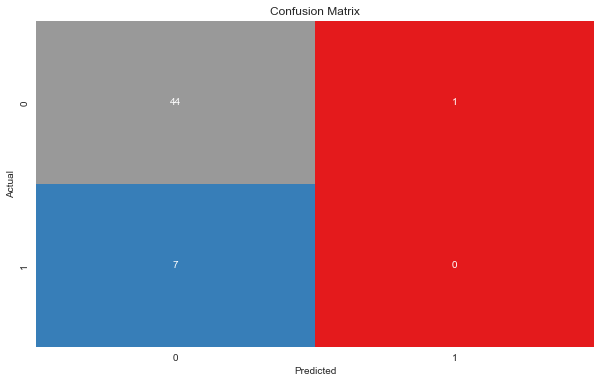

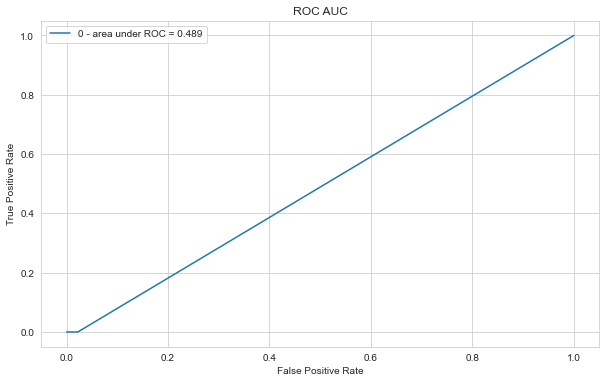

In [328]:
model_scoring = model_eval(ada["model"], X_test, y_test, multi=False)
scores["AdaBoost Classifier | Binary"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}

In [ ]:
#xgboost

In [329]:
xg_params = {
    'clf__max_depth': [8, 9],
    'clf__learning_rate': [0.1],
    'clf__n_estimators':[200],
    'clf__reg_alpha':[1.1],
    'clf__colsample_bytree':[0.8],
    'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train, y_train, X_cv, y_cv, xg_params, scale=False, n_jobs=5)

[20:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'reg_alpha': 1.1, 'subsample': 0.8}


accuracy: 84.61538461538461 %
ROC: 48.888888888888886 %


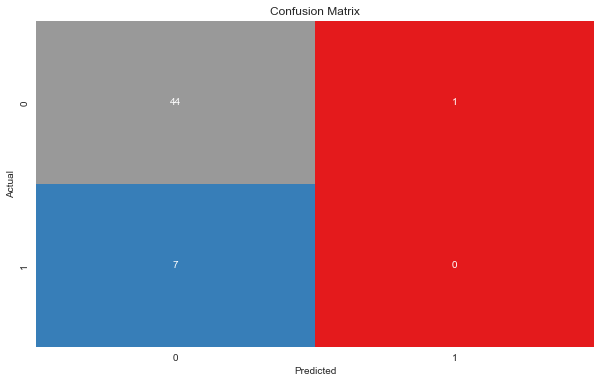

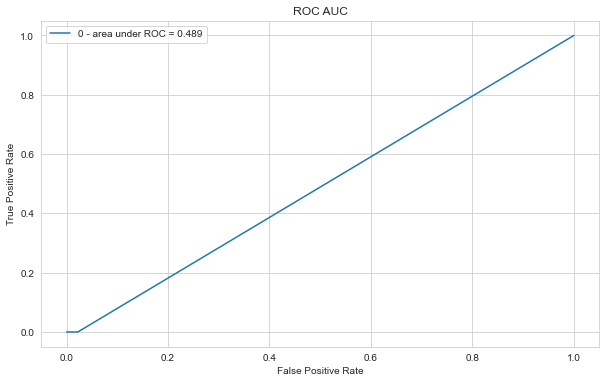

In [330]:
model_scoring = model_eval(xgboost["model"], X_test, y_test, multi=False)
scores["XGBoost | Binary"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}

In [84]:
#svm

In [116]:
# SVC()
svc_params = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma':[1, 0.01]
}

svc = Modeler(SVC, X_train, y_train, X_cv, y_cv, svc_params, scale=True, n_jobs=False)

Best Parameters for model: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


accuracy: 86.53846153846155 %
ROC: 50.0 %


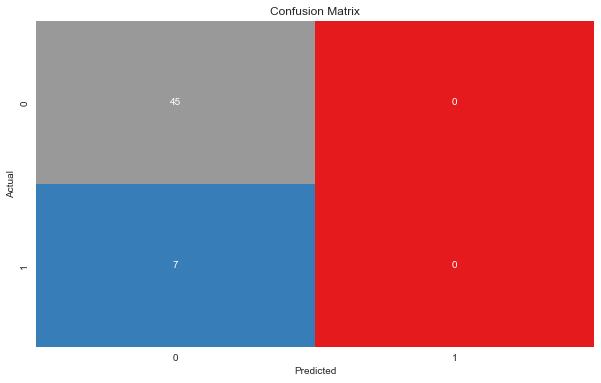

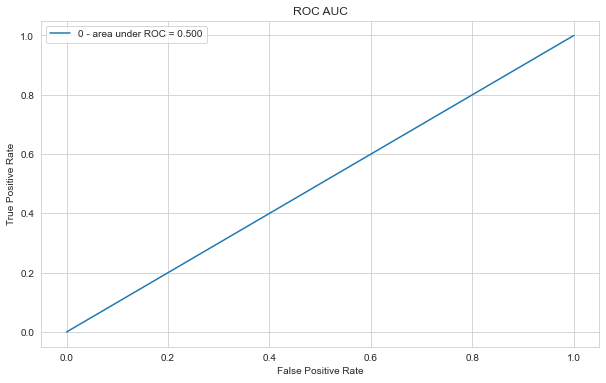

In [117]:
model_scoring = model_eval(svc["model"], X_test, y_test, multi=False)
scores["Support-Vector Machine | Binary"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}

In [45]:
# pred
y_pred = svc["model"].predict(X_test)
# evaluate
metrics_calculate('Support-Vector Machine', y_test, y_pred)

Support-Vector Machine classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69        47
           1       1.00      0.02      0.04        44

    accuracy                           0.53        91
   macro avg       0.76      0.51      0.37        91
weighted avg       0.75      0.53      0.38        91

Support-Vector Machine confusion_matrix:
 [[47  0]
 [43  1]]

Support-Vector Machine FNR:0.97727273 FPR:0.00000000
Support-Vector Machine accuracy:0.52747253


In [ ]:
# naive_bayes

In [119]:
naive_bayes = Modeler(GaussianNB, X_train, y_train, X_cv, y_cv,params={}, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 86.53846153846155 %
ROC: 68.0952380952381 %


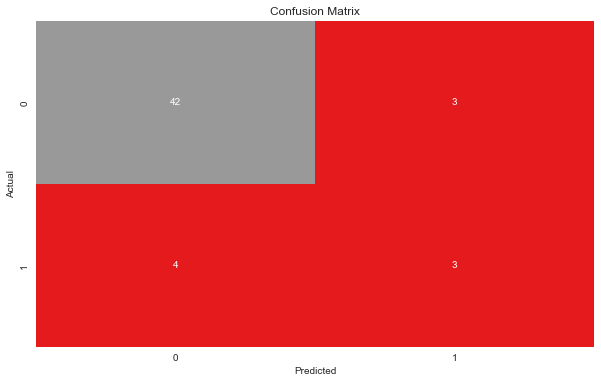

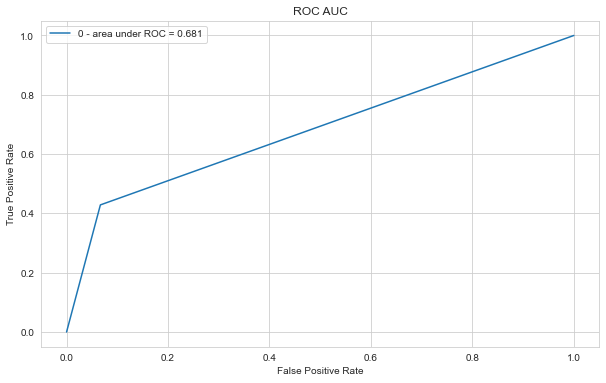

In [120]:
model_scoring = model_eval(naive_bayes["model"], X_test, y_test, multi=False)
scores["Naive Bayes | Binary"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}

In [48]:
ROC_curve = plot_roc_curve(naive_bayes["model"], X_cv, y_cv)

NameError: name 'plot_roc_curve' is not defined

In [121]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('ROC', ascending=False)

In [122]:
score_df

,Accuracy,ROC,F1-Score
Naive Bayes | Binary,0.865385,0.680952,0.692308
Support-Vector Machine | Binary,0.865385,0.500000,0.463918
AdaBoost Classifier | Binary,0.846154,0.488889,0.458333
XGBoost | Binary,0.846154,0.488889,0.458333


In [85]:
# classifiers after removing multi columnary and over sampling

In [331]:
# AdaBoostClassifier
ada_params = {
    'clf__learning_rate': [0.1, 0.5, 1.0],
    'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, ada_params, scale=False, n_jobs=False)

Best Parameters for model: {'learning_rate': 1.0, 'n_estimators': 100}


accuracy: 86.81318681318682 %
ROC: 87.0748299319728 %


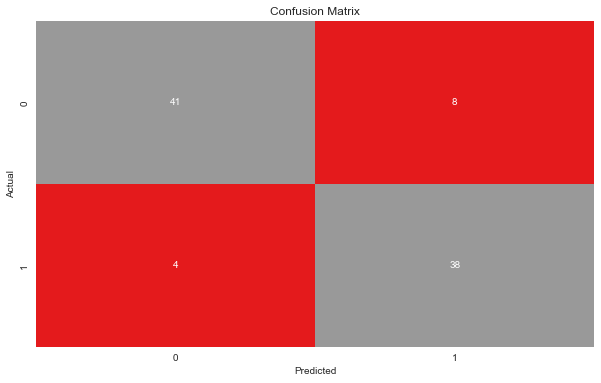

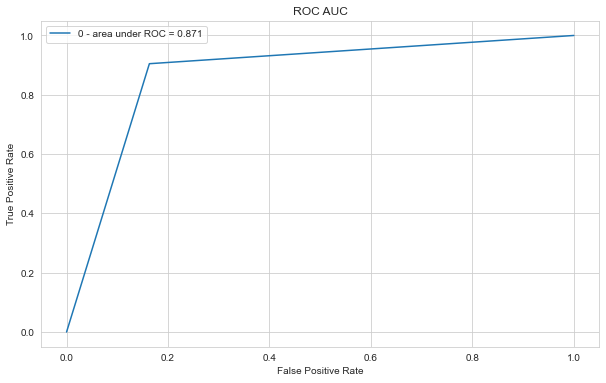

In [332]:
model_scoring = model_eval(ada["model"], X_test_over_sampled, y_test_over_sampled, multi=False)
scores["AdaBoost Classifier | Binary"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}

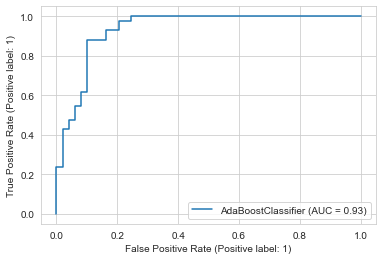

In [333]:
ROC_curve = plot_roc_curve(ada["model"], X_test_over_sampled, y_test_over_sampled)

In [ ]:
#xgboost

In [334]:

xg_params = {
    'clf__max_depth': [8, 9],
    'clf__learning_rate': [0.1],
    'clf__n_estimators':[200],
    'clf__reg_alpha':[1.1],
    'clf__colsample_bytree':[0.8],
    'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, xg_params, scale=False, n_jobs=5)

[20:49:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:49:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'reg_alpha': 1.1, 'subsample': 0.8}


accuracy: 94.5054945054945 %
ROC: 94.72789115646259 %


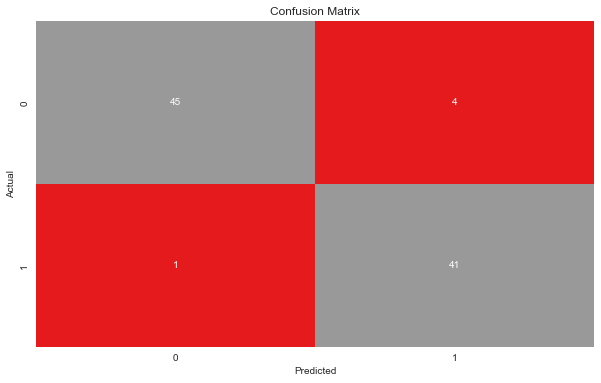

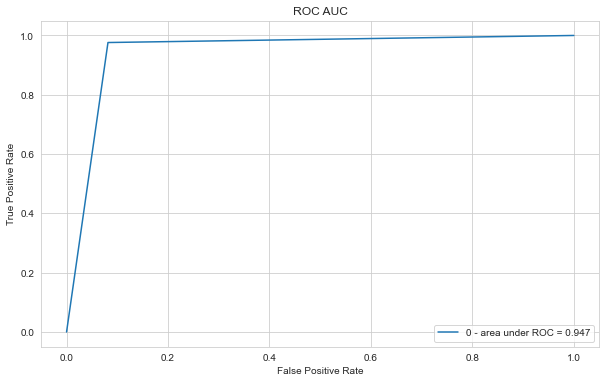

In [335]:
model_scoring = model_eval(xgboost["model"], X_test_over_sampled, y_test_over_sampled, multi=False)
scores["XGBoost | Binary"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}

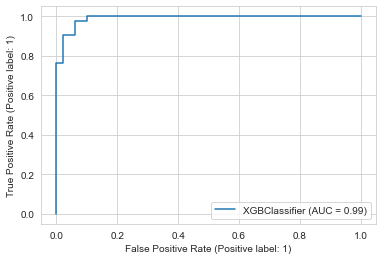

In [336]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test_over_sampled, y_test_over_sampled)

In [337]:
# SVC()
svc_params = {
    'clf__C': [0.1, 1],
    'clf__kernel': ['rbf'],
    'clf__gamma':[1, 0.01]
}

svc = Modeler(SVC, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, svc_params, scale=False, n_jobs=False)

Best Parameters for model: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


accuracy: 53.84615384615385 %
ROC: 50.0 %


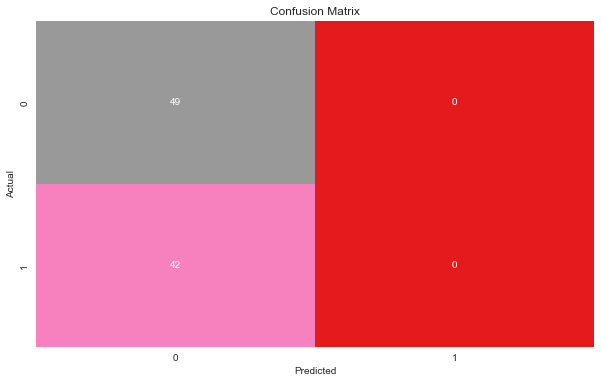

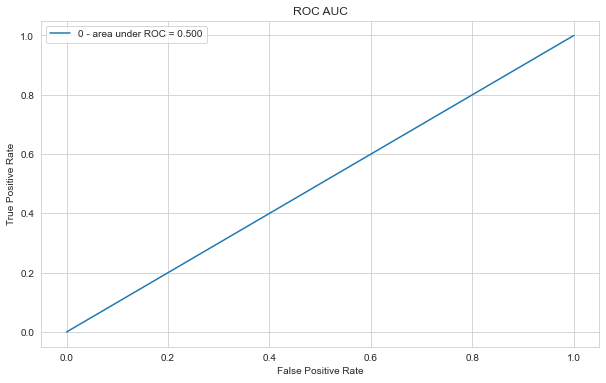

In [338]:
model_scoring = model_eval(svc["model"], X_test_over_sampled, y_test_over_sampled, multi=False)
scores["Support-Vector Machine | Binary"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}

In [ ]:
# naive_bayes

In [339]:
naive_bayes = Modeler(GaussianNB, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled,params={}, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 63.73626373626373 %
ROC: 61.73469387755102 %


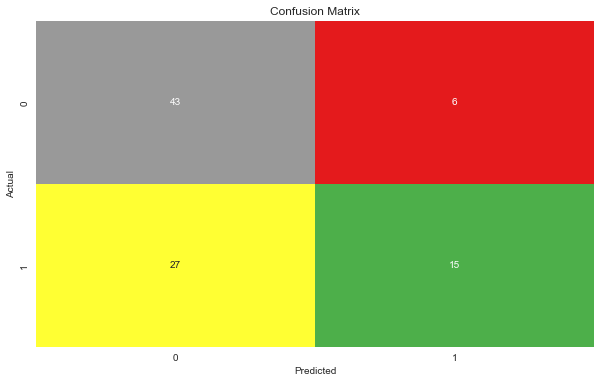

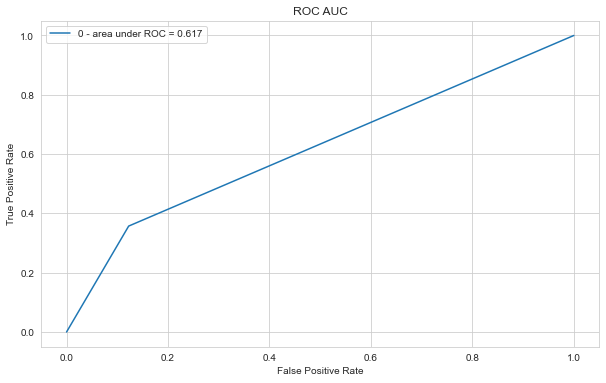

In [340]:
model_scoring = model_eval(naive_bayes["model"], X_test_over_sampled, y_test_over_sampled, multi=False)
scores["Naive Bayes | Binary"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}

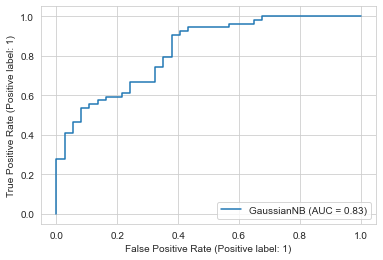

In [341]:
ROC_curve = plot_roc_curve(naive_bayes["model"], X_cv_over_sampled, y_cv_over_sampled)

In [342]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('ROC', ascending=False)

In [343]:
score_df

,Accuracy,ROC,F1-Score
XGBoost | Binary,0.945055,0.947279,0.944949
AdaBoost Classifier | Binary,0.868132,0.870748,0.867988
Naive Bayes | Binary,0.637363,0.617347,0.599440
Support-Vector Machine | Binary,0.538462,0.500000,0.350000
